In [7]:
#import basic libraries
import pandas as pd
import numpy as np
import sys
#import libraries needed for the model and data preprocessing
import sklearn.metrics as sk_metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#import visualisation libraries
import matplotlib.pyplot as plt
#import necessary libraries for model creation and training
import torch
import pytorch_lightning as pl
from pytorch_lightning.callbacks import LearningRateMonitor
import sys
sys.path.append('../')
from nbm_spam.models.concept_nbm  import ConceptNBMNary
from omegaconf import OmegaConf as omg


In [14]:
RedWine = pd.read_csv('../../Data/Wine/winequality-red.csv', delimiter = ';')
WhiteWine = pd.read_csv('../../Data/Wine/winequality-white.csv', delimiter = ';')
CombinedWineData = pd.concat([RedWine, WhiteWine])
print(CombinedWineData.shape[-1])

12


In [15]:
#Set target and training variables
target = CombinedWineData['quality']
x_wine = CombinedWineData.drop(['quality'], axis=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x_wine, target, test_size=0.15)
#Scale the data
scaler = MinMaxScaler((-1, 1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape[-1])

11


In [8]:
state_dictionary1 = torch.load('../../../local_runs/wine/nbm/0/NbmWine.pt')
state_dictionary2 = torch.load('../../../local_runs/wine/nbm/0/NbmWine1.pt')
state_dictionary3 = torch.load('../../../local_runs/wine/nbm/0/NbmWine2.pt')



In [9]:
list_of_keys = state_dictionary1.keys()
list_of_new_keys = []
for key in list_of_keys:
    print(key[6:])
    list_of_new_keys.append(key[6:])


bases_nary_models.ord1_net0.model.0.weight
bases_nary_models.ord1_net0.model.0.bias
bases_nary_models.ord1_net0.model.1.weight
bases_nary_models.ord1_net0.model.1.bias
bases_nary_models.ord1_net0.model.1.running_mean
bases_nary_models.ord1_net0.model.1.running_var
bases_nary_models.ord1_net0.model.1.num_batches_tracked
bases_nary_models.ord1_net0.model.3.weight
bases_nary_models.ord1_net0.model.3.bias
bases_nary_models.ord1_net0.model.4.weight
bases_nary_models.ord1_net0.model.4.bias
bases_nary_models.ord1_net0.model.4.running_mean
bases_nary_models.ord1_net0.model.4.running_var
bases_nary_models.ord1_net0.model.4.num_batches_tracked
bases_nary_models.ord1_net0.model.6.weight
bases_nary_models.ord1_net0.model.6.bias
bases_nary_models.ord1_net0.model.7.weight
bases_nary_models.ord1_net0.model.7.bias
bases_nary_models.ord1_net0.model.7.running_mean
bases_nary_models.ord1_net0.model.7.running_var
bases_nary_models.ord1_net0.model.7.num_batches_tracked
bases_nary_models.ord1_net0.model.9.w

In [10]:
new_dict1 = dict(zip(list_of_new_keys, list(state_dictionary1.values())))
new_dict2 = dict(zip(list_of_new_keys, list(state_dictionary2.values())))
new_dict3 = dict(zip(list_of_new_keys, list(state_dictionary3.values())))


In [83]:
print(state_dictionary.keys())

odict_keys(['model.bases_nary_models.ord1_net0.model.0.bias', 'model.bases_nary_models.ord1_net0.model.1.weight', 'model.bases_nary_models.ord1_net0.model.1.bias', 'model.bases_nary_models.ord1_net0.model.1.running_mean', 'model.bases_nary_models.ord1_net0.model.1.running_var', 'model.bases_nary_models.ord1_net0.model.1.num_batches_tracked', 'model.bases_nary_models.ord1_net0.model.3.weight', 'model.bases_nary_models.ord1_net0.model.3.bias', 'model.bases_nary_models.ord1_net0.model.4.weight', 'model.bases_nary_models.ord1_net0.model.4.bias', 'model.bases_nary_models.ord1_net0.model.4.running_mean', 'model.bases_nary_models.ord1_net0.model.4.running_var', 'model.bases_nary_models.ord1_net0.model.4.num_batches_tracked', 'model.bases_nary_models.ord1_net0.model.6.weight', 'model.bases_nary_models.ord1_net0.model.6.bias', 'model.bases_nary_models.ord1_net0.model.7.weight', 'model.bases_nary_models.ord1_net0.model.7.bias', 'model.bases_nary_models.ord1_net0.model.7.running_mean', 'model.bas

In [11]:
pred_model1 = ConceptNBMNary(11, 1)
pred_model2 = ConceptNBMNary(11, 1)
pred_model3 = ConceptNBMNary(11, 1)



In [135]:
pred_model1.load_state_dict(new_dict1)
pred_model2.load_state_dict(new_dict2)
pred_model3.load_state_dict(new_dict3)


<All keys matched successfully>

In [17]:
all_models = [pred_model1, pred_model2, pred_model3]
def nbm_plot(feature_index, feature_column):
    num_samples = 1000
    X = np.zeros((num_samples, 11))
    X[:, feature_index] = np.linspace(feature_column.min(), feature_column.max(), num_samples)
    feature_outputs = []
    for model in all_models:
        _, output = model.forward(torch.tensor(X, dtype = torch.float32))
        feature_outputs.append(output[:, feature_index].detach().cpu().numpy())
    feature_outputs = np.stack(feature_outputs, axis=0)
    output = np.mean(feature_outputs, axis=0).squeeze()

    return {'x': X[:, feature_index], 'y': output}

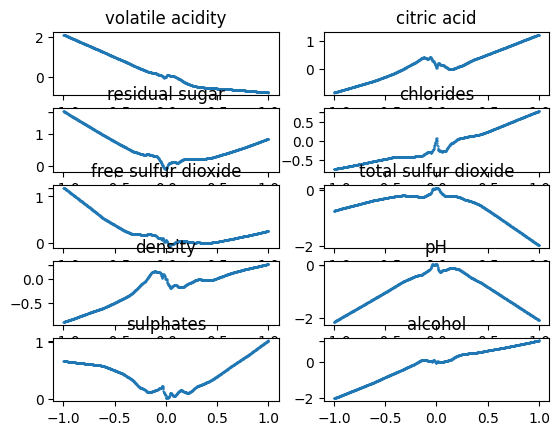

In [18]:
figure, axis = plt.subplots(5, 2)
counter = 1
for i in range(5):
    for j in range(2):
        column_of_data = X_train[:, counter]
        vis_data = nbm_plot(counter, column_of_data)
        axis[i, j].scatter(vis_data['x'], vis_data['y'], s=0.3)
        axis[i, j].set_title(x_wine.columns[counter])
        counter += 1


In [49]:
vis_data = nbm_plot(0, X_train[:, 0])
print(vis_data['y'].max())

0.50628227


In [19]:
nbm_alcohol = nbm_plot(10, X_train[:, 10])
nbm_volatile = nbm_plot(1, X_train[:, 1])
nbm_freesulf = nbm_plot(5, X_train[:, 5])
%store nbm_alcohol
%store nbm_volatile
%store nbm_freesulf

Stored 'nbm_alcohol' (dict)
Stored 'nbm_volatile' (dict)
Stored 'nbm_freesulf' (dict)
